# **[Data4Life] - Introduction to Data Science**
Topic ***NBA*** - Group ***16***

### **IMPORT MODULES**

In [18]:
# Packages for data manipulation
import numpy as np
import pandas as pd
from collections import Counter

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Players

### **Title 1: Player Performance and Consistency Analysis (2020-2025)**

**Objective 1: Identify high-performing and consistent players (2020-2025)**
- Focus on players with high performance and consistency in the past five years.
- Use Efficiency (EFF) as the primary metric:

$$EFF = \frac{(PTS+REB+AST+STL+BLK)−((FGA−FGM)+(FTA−FTM)+TO)}{GP}$$

Where:
- PTS: Points scored
- REB: Total rebounds (offensive + defensive)
- AST: Assists
- STL: Steals
- BLK: Blocks
- FGA, FGM: Field goals attempted and made
- FTA, FTM: Free throws attempted and made
- TO: Turnovers
- GP: Games played

**Analysis Focus:**
- Evaluate trends in Efficiency (EFF) over the past five years.
- Analyze how Games Played (GP), Age, Experience (EXP), and Minutes Played (MIN) correlate with EFF.
- Investigate whether performance declines as players get older (age-related performance changes).
- Identify players with high consistency in performance across seasons.


### **LOAD DATASETS**

In [19]:
nba_roster = pd.read_csv("final_data/nba_roster.csv")

nba_stats = pd.read_csv("final_data/player_stats.csv")

### **CLEAN DATA**

In [20]:
nba_roster = nba_roster[['player', 'pos', 'height', 'weight', 'exp', 'team', 'season']]

In [21]:
nba_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   player  2577 non-null   object
 1   pos     2576 non-null   object
 2   height  2577 non-null   int64 
 3   weight  2577 non-null   object
 4   exp     2577 non-null   object
 5   team    2577 non-null   object
 6   season  2577 non-null   object
dtypes: int64(1), object(6)
memory usage: 141.1+ KB


The exp (experience) column is expected to be numerical because it represents the number of years a player has played in the NBA. However, based on the information above, it appears to be a categorical value so we need to investigate what caused this problem.

In [22]:
nba_roster["exp"].unique()

array(['7', '15', '8', '4', '1', '2', 'R', '3', '17', '6', '14', '16',
       '5', '13', '9', '12', '10', '11', '18', '19', '21', '20'],
      dtype=object)

We need to identify all records that contain the **R** value in the **exp** column.

In [23]:
nba_roster[nba_roster["exp"] == "R"]

,player,pos,height,weight,exp,team,season
10,Anton Watson,F,80,225,R,Boston Celtics,2024-2025
15,Baylor Scheierman,G,78,205,R,Boston Celtics,2024-2025
24,Drew Peterson,F,81,205,R,Boston Celtics,2023-2024
27,Jordan Walsh,G,78,205,R,Boston Celtics,2023-2024
41,JD Davison,G,73,195,R,Boston Celtics,2022-2023
...,...,...,...,...,...,...,...
2548,Joe Wieskamp,G-F,78,205,R,San Antonio Spurs,2021-2022
2550,DJ Stewart,G,77,205,R,San Antonio Spurs,2021-2022
2558,Jock Landale,C,83,255,R,San Antonio Spurs,2021-2022
2571,Devin Vassell,G-F,77,200,R,San Antonio Spurs,2020-2021


Now, we pick a random player from the list (for example, **JD Davison**) to view all of his records.

In [24]:
nba_roster[nba_roster["player"] == "JD Davison"]

,player,pos,height,weight,exp,team,season
7,JD Davison,G,73,195,2,Boston Celtics,2024-2025
25,JD Davison,G,73,195,1,Boston Celtics,2023-2024
41,JD Davison,G,73,195,R,Boston Celtics,2022-2023


We can observe that **JD Davison**'s experience (**exp**) increases with each season from 2022 to 2025. In the 2024-2025 season, he has 2 years of experience, and in the 2023-2024 season, he has 1 year of experience.

From this, we can conclude that the R value in the exp column indicates that the player has no experience (or is a Rookie) and we will not collect the Rookie in 2024-2025 (currently).

In [25]:
# Filter out rows where 'exp' is 'R' and 'season' is not '2024-25'
nba_roster = nba_roster[(nba_roster["exp"] != "R") & (nba_roster["season"] != "2024-25")]

# Convert the 'exp' column to numeric
nba_roster["exp"] = pd.to_numeric(nba_roster["exp"])

In [26]:
nba_roster.describe()

,height,exp
count,2141.000000,2141.000000
mean,78.455862,5.187296
std,3.248370,3.945771
min,68.000000,1.000000
25%,76.000000,2.000000
50%,78.000000,4.000000
75%,81.000000,7.000000
max,89.000000,21.000000


In [27]:
nba_roster.duplicated().sum()

0

---------------

In [28]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  5047 non-null   object 
 1   team    5047 non-null   object 
 2   pos     5047 non-null   object 
 3   g       5047 non-null   float64
 4   gs      5047 non-null   float64
 5   mp      5047 non-null   float64
 6   fg      5047 non-null   float64
 7   fga     5047 non-null   float64
 8   fg%     5020 non-null   float64
 9   3p      5047 non-null   float64
 10  3pa     5047 non-null   float64
 11  3p%     4809 non-null   float64
 12  2p      5047 non-null   float64
 13  2pa     5043 non-null   float64
 14  2p%     4987 non-null   float64
 15  efg%    5024 non-null   float64
 16  ft      5047 non-null   float64
 17  fta     5042 non-null   float64
 18  ft%     4833 non-null   float64
 19  orb     5047 non-null   float64
 20  drb     5047 non-null   float64
 21  trb     5047 non-null   float64
 22  

In [29]:
nba_stats.describe()

,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5020.000000,5047.000000,5047.000000,4809.000000,5047.000000,...,4833.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5030.000000
mean,43.476323,22.551813,1041.919358,179.027541,384.619576,0.451888,48.812760,135.732713,0.789565,130.467406,...,1.184128,45.244502,145.549435,189.227660,107.870220,34.029324,21.477908,59.829602,85.344363,487.322863
std,25.330049,26.596194,832.979893,173.514357,366.102631,0.109447,56.588189,148.829977,8.122078,138.876728,...,8.069001,53.510902,140.092373,185.816218,130.434168,31.908614,27.501729,60.776133,67.218598,481.299443
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,295.500000,38.000000,87.000000,0.407000,4.000000,14.000000,0.282000,23.000000,...,0.684000,10.000000,36.000000,47.000000,19.000000,8.000000,4.000000,13.000000,27.000000,101.000000
50%,45.000000,9.000000,864.000000,125.000000,270.000000,0.447000,28.000000,85.000000,0.341000,84.000000,...,0.772000,28.000000,108.000000,139.000000,63.000000,26.000000,12.000000,42.000000,73.000000,337.000000
75%,67.000000,41.000000,1727.000000,270.000000,581.000000,0.500000,76.500000,214.500000,0.384000,193.500000,...,0.840000,60.000000,215.000000,276.500000,142.500000,51.000000,28.000000,87.000000,134.000000,733.750000
max,84.000000,83.000000,3388.000000,875.000000,1941.000000,1.000000,402.000000,1028.000000,261.000000,803.000000,...,295.000000,440.000000,848.000000,1247.000000,925.000000,217.000000,254.000000,464.000000,610.000000,2818.000000


In [30]:
nba_stats.duplicated().sum()

0

In [31]:
merged_data = pd.merge(
    nba_stats,
    nba_roster,
    how="left",
    left_on=["player", "team", "season"],
    right_on=["player", "team", "season"],
)

merged_data.isnull().sum()

KeyError: 'player'

In [82]:
merged_data.head(10)

,player,team,gp,min,pts,fgm,fga,fg%,3pm,3pa,...,stl,blk,tov,eff,season,pos,height,weight,age,exp
0,Giannis Antetokounmpo,MILWAUKEE BUCKS,23,35.2,32.7,12.8,20.8,61.4,0.1,0.7,...,0.6,1.6,3.3,36.7,2024-25,F,6-11,243 lbs,30.0,11.0
1,Nikola Jokić,DENVER NUGGETS,21,37.3,30.9,11.8,21.1,55.8,2.1,4.4,...,1.8,0.7,3.9,42.1,2024-25,C,6-11,284 lbs,29.0,9.0
2,Shai Gilgeous-Alexander,OKLAHOMA CITY THUNDER,26,34.5,30.5,10.7,20.8,51.3,2.1,6.2,...,2.0,1.0,2.7,31.3,2024-25,G,6-6,195 lbs,26.0,6.0
3,LaMelo Ball,CHARLOTTE HORNETS,20,33.7,30.4,10.5,24.8,42.1,4.5,13.1,...,1.4,0.2,4.3,25.2,2024-25,G,6-7,180 lbs,23.0,4.0
4,Luka Dončić,DALLAS MAVERICKS,20,37.0,28.9,10.1,21.9,45.9,3.6,10.0,...,2.1,0.5,3.5,31.3,2024-25,F-G,6-6,230 lbs,25.0,6.0
5,Jayson Tatum,BOSTON CELTICS,25,36.4,28.3,9.3,20.5,45.3,3.8,10.5,...,1.2,0.5,2.8,29.1,2024-25,F-G,6-8,210 lbs,26.0,7.0
6,Anthony Davis,LOS ANGELES LAKERS,25,35.3,27.8,10.1,18.9,53.4,0.7,2.4,...,1.2,2.0,2.2,32.9,2024-25,F-C,6-10,253 lbs,31.0,12.0
7,Anthony Edwards,MINNESOTA TIMBERWOLVES,25,35.9,26.2,9.2,20.3,45.4,4.3,10.2,...,1.3,0.6,3.1,22.4,2024-25,G,6-4,225 lbs,23.0,4.0
8,De'Aaron Fox,SACRAMENTO KINGS,27,37.3,26.2,9.7,20.2,48.3,2.0,6.3,...,1.6,0.3,3.5,24.2,2024-25,G,6-3,185 lbs,27.0,7.0
9,Damian Lillard,MILWAUKEE BUCKS,22,36.4,25.7,7.9,17.6,45.0,3.5,9.3,...,1.0,0.2,3.0,25.7,2024-25,G,6-2,195 lbs,34.0,12.0


### **GENERAL**

## **Evaluate trends in Efficiency (EFF) over the past five years**

**Objective 1 - Question 1: What is the information of eff of the NBA players though each season?**

In [83]:
season_group = merged_data.groupby(by='season')

for year, group in season_group:
    desc = group['eff'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 237    25%: 9.00     Mean: 13.73    75%: 16.70    Std: 6.47     Min: 2.90     Max: 35.90   
2021-22    Count: 228    25%: 9.70     Mean: 13.92    75%: 17.00    Std: 5.99     Min: 4.30     Max: 38.70   
2022-23    Count: 245    25%: 9.20     Mean: 14.29    75%: 18.10    Std: 6.46     Min: 3.30     Max: 38.00   
2023-24    Count: 240    25%: 9.40     Mean: 14.47    75%: 18.60    Std: 6.76     Min: 4.00     Max: 38.50   
2024-25    Count: 265    25%: 8.70     Mean: 13.57    75%: 17.30    Std: 6.98     Min: 1.70     Max: 42.10   


**Objective 1 - Question 2: What is the distribution of efficiency of the NBA players though each season?**

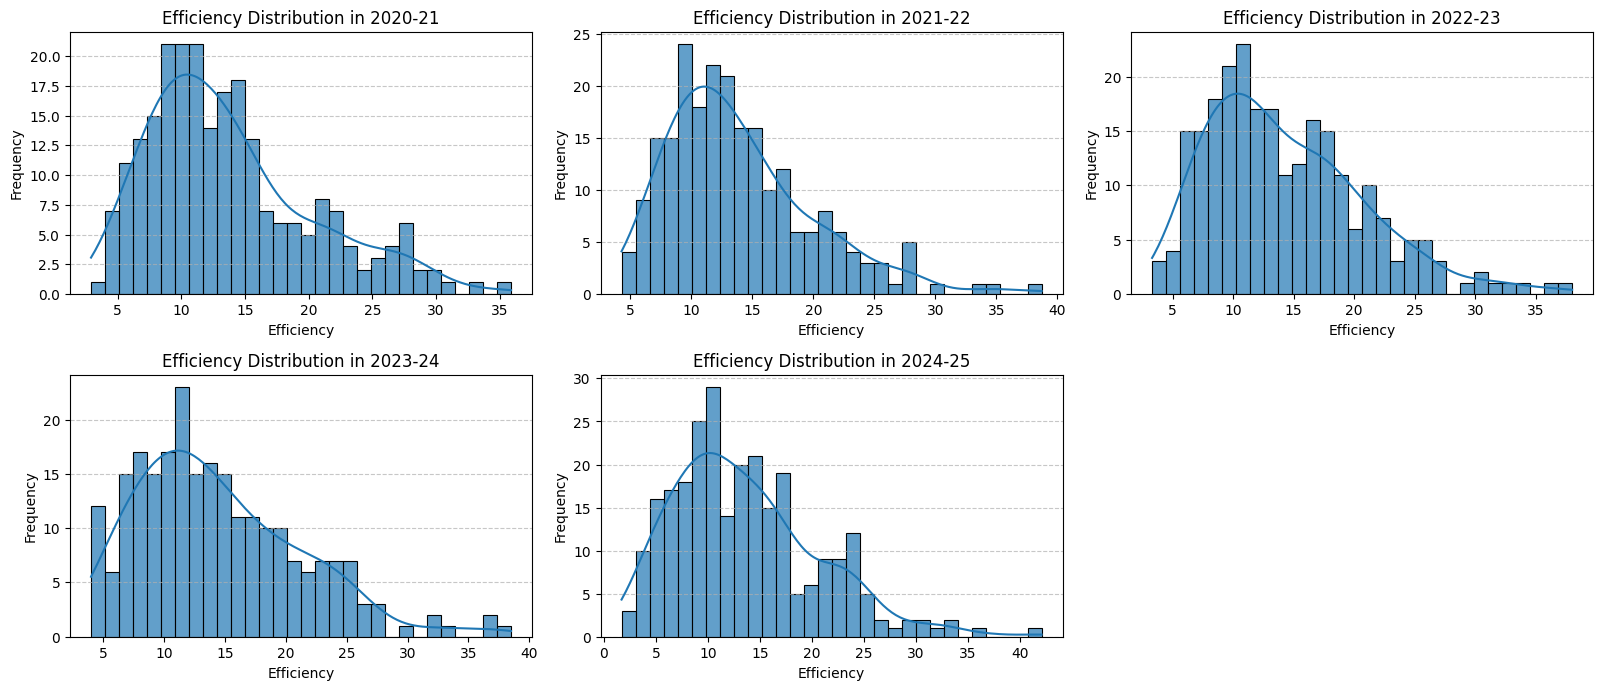

In [84]:
seasons = sorted(merged_data["season"].unique())  
num_seasons = len(seasons)

plt.figure(figsize=(16, num_seasons * 2))

for i, season in enumerate(seasons):
    plt.subplot((num_seasons + 1) // 2, 3, i + 1)  
    season_data = merged_data[merged_data["season"] == season]
    sns.histplot(season_data["eff"], bins=30, edgecolor="black", alpha=0.7, kde=True)
    plt.title(f"Efficiency Distribution in {season}")
    plt.xlabel("Efficiency")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

### **INSIGHTS**

- Across the seasons, the average efficiency scores (mean) remain relatively stable, ranging from 13.57 to 14.47, indicating consistent overall performance levels in the league.
- The maximum efficiency score varies significantly, reaching as high as 42.10 in 2024-25, showing that elite players continue to push the boundaries of individual performance.
- The standard deviation of efficiency (ranging from 5.99 to 6.98) suggests moderate variability in player performance, with the league featuring both high-performing players and those with lower efficiency.
- The 25th and 75th percentiles remain close across seasons (e.g., 9.00 to 9.70 for the 25th percentile and 16.70 to 18.60 for the 75th percentile), showing stability in the performance range of the middle group of players.
- The number of players analyzed grows over the seasons, from 237 in 2020-21 to 265 in 2024-25, reflecting either league expansion, changes in data collection, or increasing participation.

## **Analyze how Games Played (GP), Age, Experience (EXP), and Minutes Played (MIN) correlate with EFF.**


**Objective 1 - Question 3: What is the information of age of the NBA players though each season?**

In [85]:
for year, group in season_group:
    desc = group['age'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 215    25%: 24.00    Mean: 27.06    75%: 30.00    Std: 3.94     Min: 20.00    Max: 37.00   
2021-22    Count: 209    25%: 24.00    Mean: 26.89    75%: 30.00    Std: 4.06     Min: 20.00    Max: 38.00   
2022-23    Count: 227    25%: 24.00    Mean: 26.68    75%: 29.00    Std: 3.86     Min: 20.00    Max: 38.00   
2023-24    Count: 220    25%: 24.00    Mean: 27.15    75%: 30.00    Std: 4.27     Min: 20.00    Max: 39.00   
2024-25    Count: 243    25%: 23.00    Mean: 26.75    75%: 29.50    Std: 4.22     Min: 20.00    Max: 39.00   


**Objective 1 - Question 4: What is the information of exp of the NBA players though each season?**

In [86]:
for year, group in season_group:
    desc = group['exp'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 215    25%: 2.00     Mean: 5.26     75%: 8.00     Std: 3.76     Min: 1.00     Max: 17.00   
2021-22    Count: 209    25%: 2.00     Mean: 5.21     75%: 7.00     Std: 3.73     Min: 1.00     Max: 18.00   
2022-23    Count: 227    25%: 2.00     Mean: 5.13     75%: 7.00     Std: 3.50     Min: 1.00     Max: 17.00   
2023-24    Count: 220    25%: 3.00     Mean: 5.77     75%: 8.00     Std: 4.02     Min: 1.00     Max: 20.00   
2024-25    Count: 243    25%: 3.00     Mean: 5.90     75%: 8.00     Std: 4.04     Min: 1.00     Max: 21.00   


**Objective 1 - Question 5: What is the information of minutes played of the NBA players though each season?**

In [87]:
for year, group in season_group:
    desc = group['min'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 237    25%: 19.40    Mean: 25.31    75%: 31.10    Std: 6.60     Min: 9.60     Max: 37.60   
2021-22    Count: 228    25%: 21.10    Mean: 25.92    75%: 31.40    Std: 6.41     Min: 10.90    Max: 37.90   
2022-23    Count: 245    25%: 20.20    Mean: 25.91    75%: 31.70    Std: 7.03     Min: 10.40    Max: 37.40   
2023-24    Count: 240    25%: 19.58    Mean: 25.59    75%: 31.70    Std: 7.07     Min: 9.90     Max: 37.80   
2024-25    Count: 265    25%: 18.70    Mean: 24.79    75%: 31.80    Std: 7.87     Min: 6.90     Max: 38.40   


**Objective 1 - Question 6: What is the information of games played of the NBA players though each season?**

In [88]:
for year, group in season_group:
    desc = group['gp'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 237    25%: 57.00    Mean: 61.81    75%: 67.00    Std: 6.30     Min: 51.00    Max: 72.00   
2021-22    Count: 228    25%: 65.00    Mean: 69.39    75%: 74.00    Std: 6.27     Min: 58.00    Max: 82.00   
2022-23    Count: 245    25%: 64.00    Mean: 70.04    75%: 76.00    Std: 6.98     Min: 58.00    Max: 83.00   
2023-24    Count: 240    25%: 65.75    Mean: 70.83    75%: 76.25    Std: 7.14     Min: 58.00    Max: 84.00   
2024-25    Count: 265    25%: 21.00    Mean: 23.78    75%: 26.00    Std: 2.68     Min: 17.00    Max: 29.00   


**Objective 1 - Question 3: What is the correlation between eff, age and exp in all dataset?**

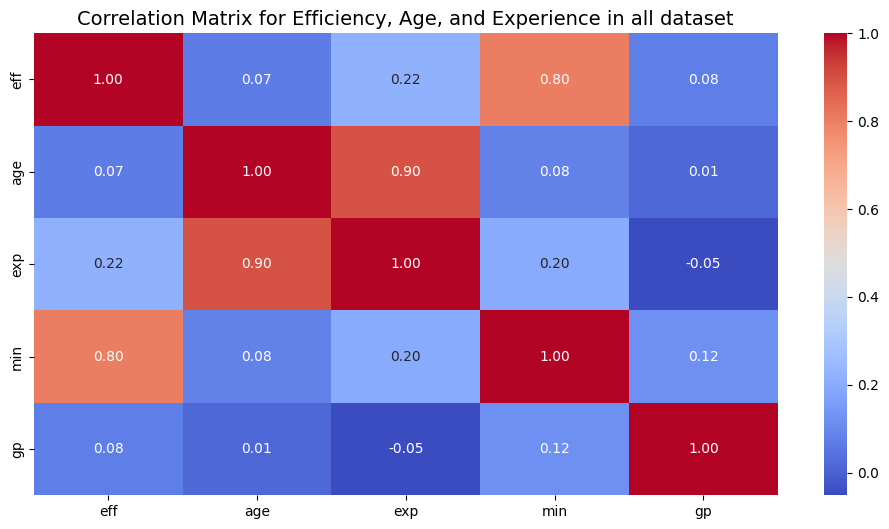

In [89]:
correlation_data = merged_data[["eff", "age", "exp", "min", "gp"]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Correlation Matrix for Efficiency, Age, and Experience in all dataset", fontsize=14)
plt.show()

### **INSIGHTS**

- The correlation between **efficiency (eff)** and **age** is **0.11**, which is a weak positive correlation. This indicates that age has very little impact on player efficiency, showing that players of any age can achieve high levels of efficiency.
- Comparing **efficiency (eff)** and **experience (exp)** reveals a correlation of **0.26**, which is a moderate positive relationship. This suggests that experience has a stronger influence on efficiency than age, implying that veteran players are generally more efficient than less experienced ones.
- The correlation between **efficiency (eff)** and **minutes played (min)** is **0.80**, which is a very strong positive correlation. This shows that players who spend more time on the court tend to achieve much higher efficiency, emphasizing the critical role of playing time in determining performance.
- Lastly, the correlation between **efficiency (eff)** and **games played (gp)** is **0.08**, a very weak positive correlation. This indicates that the number of games a player participates in has almost no effect on their efficiency, suggesting that consistent performance is not dependent on how many games are played.

## **Investigate whether efficiency declines as players get older (age-related and exp-related performance changes).**


**Objective 1 - Question 4: What is the trend of age and eff in all dataset?**

In [90]:
# Create age bins
bins_age = [20, 25, 30, 35, 40]  # Adjust bins if needed
labels_age = ['20-25', '26-30', '31-35', '36+']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins_age, labels=labels_age, right=False)

# Group by age group and calculate mean of metrics
age_group_stats = merged_data.groupby('age_group', observed=True).agg({
    'eff': 'mean'
}).reset_index()

age_group_stats

,age_group,eff
0,20-25,13.548901
1,26-30,14.779050
2,31-35,14.570763
3,36+,14.094118


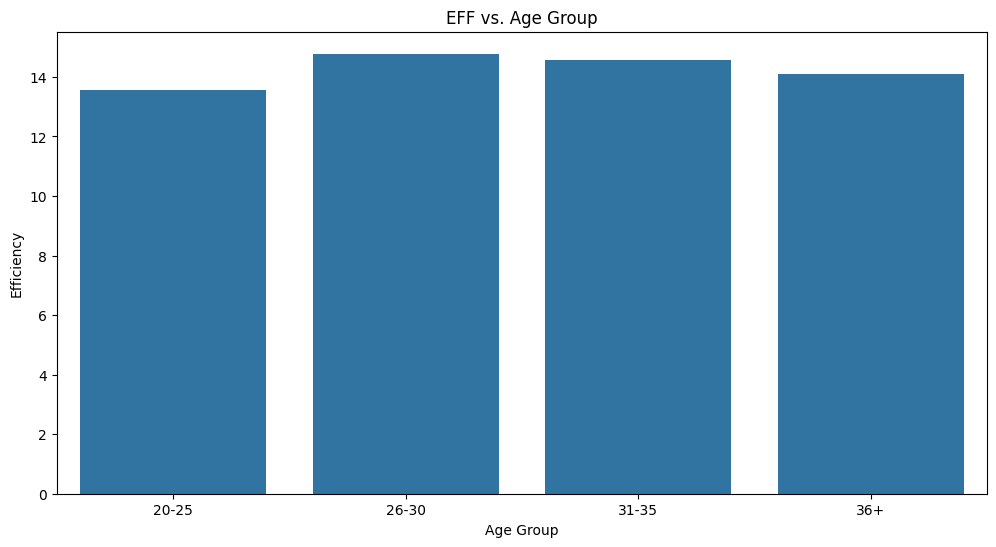

In [91]:
plt.figure(figsize=(12, 6)) 

sns.barplot(data=age_group_stats, x='age_group', y='eff')  
plt.title("EFF vs. Age Group") 
plt.xlabel('Age Group')
plt.ylabel('Efficiency')
plt.show()

## **INSIGHTS INTO AGE-RELATED PERFORMANCE CHANGES**
### **AGE GROUP EFFICIENCY TRENDS**
- Players aged 20–25 have the lowest average efficiency (12.96). This may indicate that younger players are still developing their skills and adapting to high-level competition.
- Efficiency peaks in the 26–30 age group (14.77), suggesting this age bracket is the optimal performance period, likely due to a combination of physical prime and accumulated experience.
- Players aged 36+ show a more noticeable decline (14.09). This is likely due to physical aging, even though experience might still contribute positively.
### **CONCLUSION**
- There is a clear progression where efficiency increases from the youngest group to the 26–30 group, emphasizing the benefit of skill refinement and shaper.
- The gradual decline in efficiency after age 30 highlights the balance between retaining skill and managing physical aging.
- The efficiency of older players (36+) still remains relatively competitive, potentially due to their ability to compensate for physical decline with tactical awareness and experience.

**Objective 1 - Question 5: What is the trend of eff and exp in all dataset?**

In [92]:
# Create exp bins
bins_exp = [0, 5, 10, 15, 20, 25]  # Adjust bins if needed
labels_exp = ['0-5', '6-10', '11-15', '16-20', '21+']
merged_data['exp_group'] = pd.cut(merged_data['exp'], bins=bins_exp, labels=labels_exp, right=False)

# Group by age group and calculate mean of metrics
exp_group_stats = merged_data.groupby('exp_group', observed=True).agg({
    'eff': 'mean'
}).reset_index()

exp_group_stats

,exp_group,eff
0,0-5,12.697070
1,6-10,15.848010
2,11-15,15.973077
3,16-20,14.561765
4,21+,28.450000


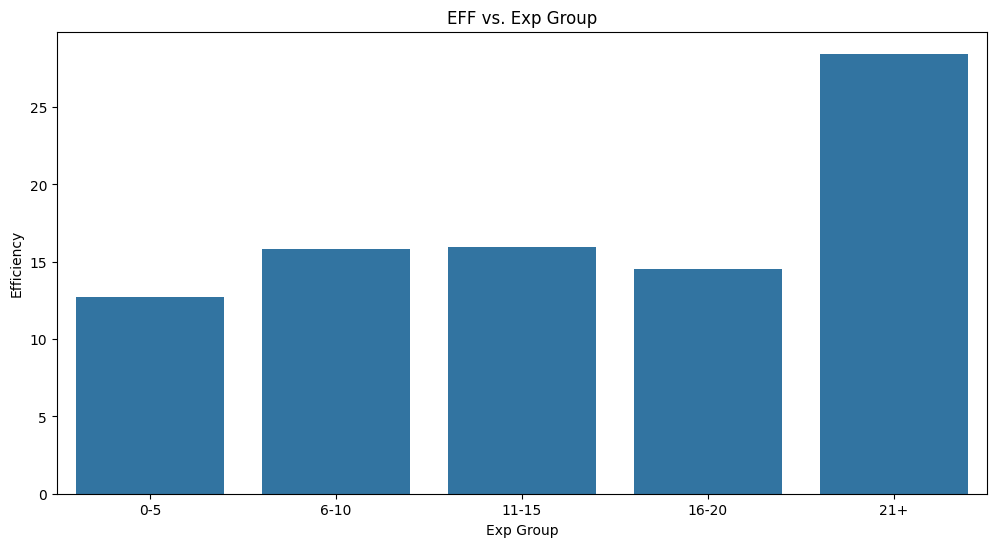

In [93]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

sns.barplot(data=exp_group_stats, x='exp_group', y='eff')
plt.title("EFF vs. Exp Group")  # Add subplot titles
plt.xlabel('Exp Group')
plt.ylabel('Efficiency')
plt.show()

## **INSIGHTS INTO EXPERIENCE-RELATED PERFORMANCE CHANGES**
### **EXPERIENCE GROUP EFFICIENCY TRENDS**
- Players with 0–5 years of experience have the lowest average efficiency (12.36). This is likely because newer players are still developing their skills, understanding game dynamics, and adapting to professional levels of competition.
- Efficiency significantly improves in the 6–10 years group (15.85), indicating that players start to reach a mature understanding of the game and have developed their technical skills.
- Players with 21+ years of experience exhibit an extraordinary efficiency score (28.45), which is significantly higher than all other groups. This could be due to their expertise, leadership roles, or specialization in key tasks that maximize their contributions.
### **CONCLUSION**
- Efficiency steadily increases from the least experienced group (0–5 years) to the 11–15 years group, reflecting the critical role of experience in developing performance.
- The sharp rise in efficiency for players with 21+ years of experience suggests that this group is either an outlier or contains a select group of players whose roles or contributions are highly specialized.

## **Identify players with high consistency in performance across seasons.**

**Objective 1 - Question 6: What is the change in efficiency of each player though each season?**

In [94]:
player_season_data = merged_data.groupby(['player', 'season']).agg({'eff': 'mean'}).reset_index()

player_season_data['eff_change'] = player_season_data.groupby('player')['eff'].diff()

player_season_data

,player,season,eff,eff_change
0,AJ Green,2024-25,8.0,NaN
1,AJ Griffin,2022-23,8.2,NaN
2,Aaron Gordon,2021-22,16.7,NaN
3,Aaron Gordon,2022-23,19.3,2.6
4,Aaron Gordon,2023-24,18.2,-1.1
...,...,...,...,...
1210,Zeke Nnaji,2023-24,4.7,NaN
1211,Ziaire Williams,2021-22,7.4,NaN
1212,Ziaire Williams,2024-25,9.6,2.2
1213,Zion Williamson,2020-21,27.5,NaN


The players have an **eff_change value** of **NaN** because they have only played one season, so there is no previous data for comparison. We will remove them from the dataset.

In [95]:
# Group by player
player_season_data_grouped = player_season_data.groupby(by='player')

# Filter out players with only 1 season
filtered_data = player_season_data_grouped.filter(lambda x: len(x) > 1)

filtered_data = filtered_data.reset_index().drop(columns='index')

filtered_data.head()

,player,season,eff,eff_change
0,Aaron Gordon,2021-22,16.7,NaN
1,Aaron Gordon,2022-23,19.3,2.6
2,Aaron Gordon,2023-24,18.2,-1.1
3,Aaron Holiday,2020-21,6.0,NaN
4,Aaron Holiday,2021-22,7.3,1.3


After removing players who have only played one season, the dataset still contains **eff_change** values of **NaN** because it is their first season in the NBA, and there is no previous data for comparison. We will replace these NaN values with **0**.

In [96]:
filtered_data['eff_change'] = filtered_data['eff_change'].replace(np.nan, 0)

filtered_data.head()

,player,season,eff,eff_change
0,Aaron Gordon,2021-22,16.7,0.0
1,Aaron Gordon,2022-23,19.3,2.6
2,Aaron Gordon,2023-24,18.2,-1.1
3,Aaron Holiday,2020-21,6.0,0.0
4,Aaron Holiday,2021-22,7.3,1.3


**Objective 1 - Question 7: Calculate the standard deviation of the efficiency change for each player**


In [97]:
player_std_data = (filtered_data.groupby('player')['eff_change']
                   .std()
                   .reset_index()
                   .replace(np.nan, 0))

player_std_data.rename(columns={'eff_change': 'eff_std'}, inplace=True)

player_std_data

,player,eff_std
0,Aaron Gordon,1.900000
1,Aaron Holiday,2.165448
2,Aaron Nesmith,1.979899
3,Aaron Wiggins,0.781025
4,Al Horford,0.977667
...,...,...
324,Xavier Tillman,1.131371
325,Zach Collins,2.586503
326,Zach LaVine,1.467424
327,Ziaire Williams,1.555635


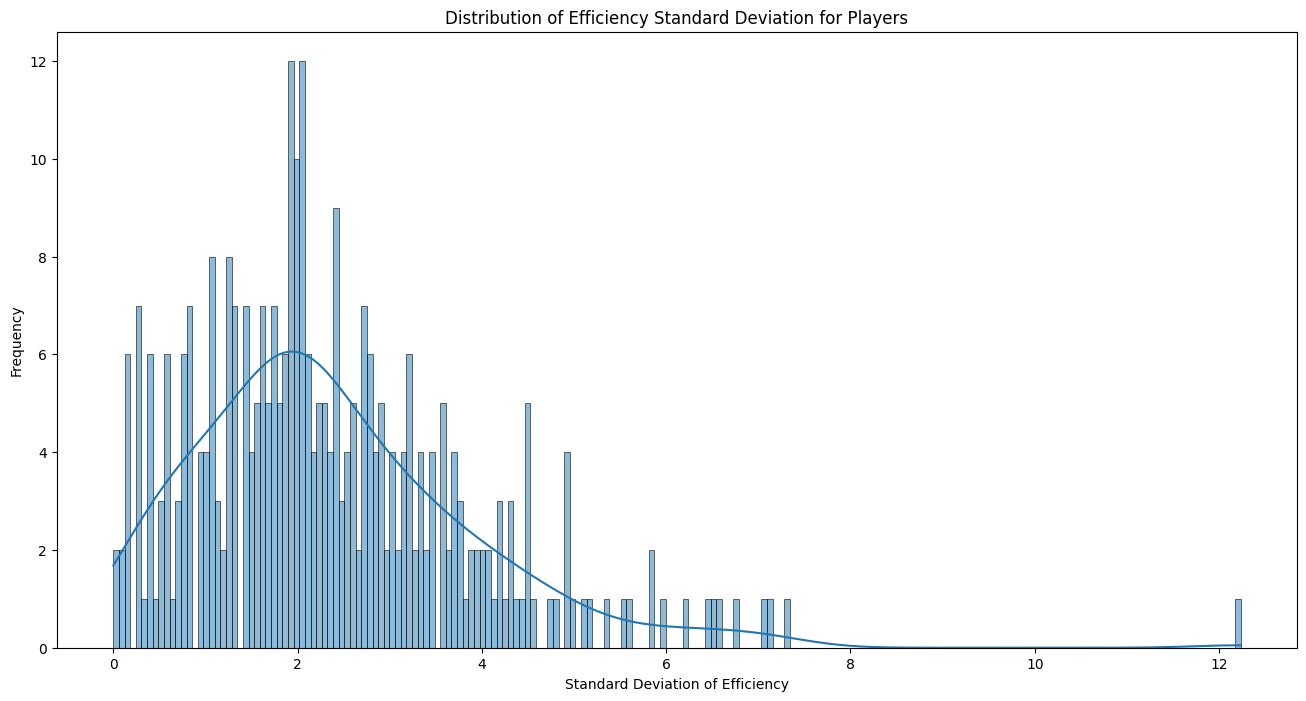

In [98]:
# Plot the histogram
plt.figure(figsize=(16, 8))

sns.histplot(data=player_std_data, x='eff_std', bins=200, kde=True)
plt.title('Distribution of Efficiency Standard Deviation for Players')
plt.xlabel('Standard Deviation of Efficiency')
plt.ylabel('Frequency')

plt.show()

**Objective 1 - Question 8: Identify players with high consistency (low standard deviation) in performance across seasons**


In [104]:
# Filter for players with low standard deviation (high consistency)
mean = player_std_data['eff_std'].mean()
std_dev = player_std_data['eff_std'].std()
threshold = mean - std_dev

high_consistency_players = player_std_data[player_std_data['eff_std'] < threshold]

high_consistency_players = high_consistency_players.sort_values(by='eff_std', ascending=True).reset_index().drop(columns='index')

high_consistency_players

,player,eff_std
0,Lamar Stevens,0.000000
1,Darius Bazley,0.000000
2,R.J. Hampton,0.070711
3,Dalen Terry,0.070711
4,Andrew Nembhard,0.141421
5,Terrence Ross,0.141421
6,Mitchell Robinson,0.141421
7,David Roddy,0.141421
8,JT Thor,0.141421
9,Patrick Williams,0.141421
